Number of Colors required to color the graph : 6


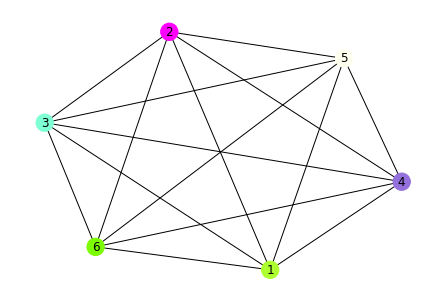

In [80]:
import networkx as nx
import matplotlib.pyplot as plt
import random



colors = ["black", "dimgray", "dimgrey", "gray", "slategrey", "lightsteelblue", "bisque", "darkorange", "burlywood",
              "antiquewhite", "tan", "forestgreen", "limegreen", "darkgreen", "cornflowerblue", "green", "lime", "grey",
              "royalblue",
              "ghostwhite", "lavender", "midnightblue", "navajowhite", "blanchedalmond", "papayawhip", "darkgray",
              "darkgrey",
              "silver", "lightgray lightgrey", "gainsboro", "whitesmoke", "navy", "darkblue", "moccasin", "orange",
              "mediumblue",
              "mediumseagreen", "springgreen", "mintcream", "mediumspringgreen", "mediumaquamarine", "aquamarine",
              "turquoise",
              "lightseagreen mediumturquoise", "wheat", "blue", "white", "oldlace", "floralwhite", "darkgoldenrod",
              "goldenrod",
              "slateblue", "darkslateblue", "mediumslateblue", "snow", "rosybrown", "lightcoral", "indianred",
              "cornsilk", "azure",
              "mediumpurple", "rebeccapurple", "blueviolet", "gold", "lemonchiffon", "brown", "indigo", "firebrick",
              "khaki",
              "lightcyan", "paleturquoise", "darkslategray", "darkslategrey", "teal", "darkorchid", "maroon",
              "darkviolet",
              "palegoldenrod", "darkkhaki", "darkred", "mediumorchid", "red", "darkcyan", "thistle", "aqua",
              "mistyrose", "salmon",
              "plum", "violet", "tomato", "darksalmon", "purple", "darkmagenta", "fuchsia", "coral", "orangered",
              "lightsalmon",
              "sienna", "ivory", "beige", "lightyellow", "lightgoldenrodyellow", "olive", "yellow", "olivedrab",
              "yellowgreen",
              "darkolivegreen", "greenyellow", "chartreuse", "lawngreen", "honeydew", "darkseagreen", "palegreen",
              "cyan",
              "darkturquoise", "cadetblue", "powderblue", "lightblue", "deepskyblue", "skyblue", "lightskyblue",
              "steelblue",
              "magenta", "orchid", "seashell", "mediumvioletred", "deeppink", "hotpink", "lavenderblush", "chocolate",
              "saddlebrown",
              "aliceblue", "sandybrown", "peachpuff", "palevioletred", "crimson", "dodgerblue", "lightslategray",
              "lightslategrey"]

def isComplete(g):
    degrees=dict(g.degree).values()
    for i in degrees:
        if i==g.number_of_nodes()-1:
            continue
        else:
            return False
    return True

def color(g):
    maxdegree = max(dict(g.degree).values())
    lists = list(random.sample(colors, maxdegree))
    blacklisted = []
    if(isComplete(g) is True):
            lists=list(random.sample(colors, g.number_of_nodes()))
            color=0
            for i in (g.nodes()):
                g.nodes[i]['color'] = lists[color]
                color+=1
            return
            
    
    if len(list(g.nodes)) == 0:
        return
    
    for i in list(g.nodes):
        neighbors = dict(g[i])
        nodes = list(neighbors.keys())
        
        for j in nodes:
            if len(g.nodes().data()[j].keys()) == 0:
                continue

            elif g.nodes().data()[j]['color'] is not None:
                forbiddencolor = g.nodes().data()[j]['color']
                blacklisted.append(forbiddencolor)
    
        for color in lists:
            if color in blacklisted:
                continue
        
            else:
                g.nodes()[i]['color'] = color
                break

def distinctColors(g):
    colors=set()
    
    for i in g.nodes():
        colors.add(g.nodes()[i]['color'])
    
    return len(colors)

G = nx.Graph()
G.add_nodes_from([

    (1, {"color": None}),
    (2, {"color": None}),
    (3, {"color": None}),
    (4, {"color": None}),
    (5, {"color": None}),
    (6, {"color": None}),

])
G.add_edges_from([(3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (1, 6),(1,2),(1,3),(1,4),(1,5),(2,1),(2,3),(2,5),(2,4),(2,6),(4,5),(4,6),(5,6)])
color(G)
print("Number of Colors required to color the graph :",distinctColors(G))
colors_nodes = [data['color'] for v, data in G.nodes(data=True)]
nx.draw(G, node_color=colors_nodes, with_labels=True)
